<a href="https://colab.research.google.com/github/Dconsultstech/Machine-Learning-Projects/blob/main/fetch_california_housing_XGBRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor
import sklearn.datasets

In [5]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [6]:
dir(housing)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [9]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

### Loading The fetch_california_housing Dataset from sklearn datasets

In [20]:
house_dataset = pd.DataFrame(housing.data,columns=housing.feature_names)
house_dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [15]:
housing.target_names

['MedHouseVal']

In [21]:
house_dataset['Target'] = housing.target

In [22]:
house_dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Data Analysis

In [23]:
house_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


 ### The datasets contains float data types and also 20640 datapoints

> Add blockquote



In [24]:
house_dataset.isnull().sum()   ### To check if there's a missing value in the dataset

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

Understanding More about the data by checking the basic statistics and the correction between features

In [25]:
house_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
Target,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


In [26]:
#### Correction


house_dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


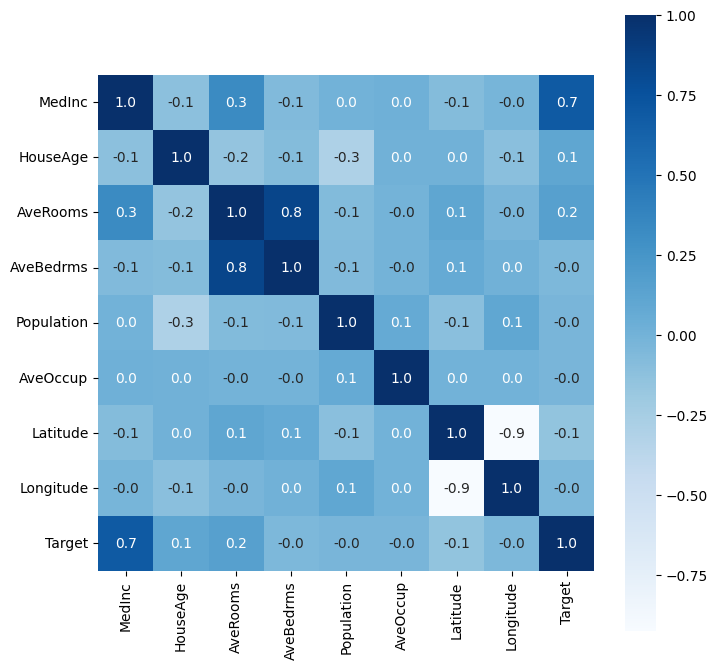

In [35]:
plt.figure(figsize=(8,8))
sns.heatmap(house_dataset.corr(),cbar=True,square=True,annot=True,fmt='.1f',cmap='Blues')
plt.show();

In [49]:
#### Standardizing the Dataset


In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()

### Model Building

In [52]:
X = house_dataset.drop(['Target'],axis= 1)
X_transformed = scaler.fit_transform(X)

Y = house_dataset['Target']

### Spliting of the dataset for Training and Testing the model for inference

In [53]:
X_train,X_test,Y_train,Y_test = train_test_split(X_transformed,Y, test_size=0.2,random_state=2)

In [54]:
X_train.shape,Y_train.shape

((16512, 8), (16512,))

In [43]:
#### Model building


In [56]:
model = XGBRegressor(n_jobs=5,random_state=2)
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=5,
             num_parallel_tree=None, random_state=2, ...)

In [57]:
train_prediction = model.predict(X_train)
test_prediction = model.predict(X_test)

### Visualization of the predicted value vs the actual value using scattered plot

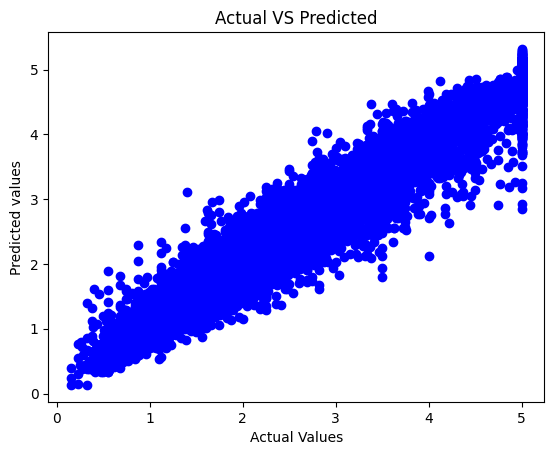

In [68]:
#plt.figure(figsize=(6,6))
plt.scatter(Y_train,train_prediction,color='blue')
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("Actual VS Predicted")
plt.show();

In [58]:
#### Metrics
## R_Square and Mean_absolute_error metrics

In [60]:
r_score_train = metrics.r2_score(Y_train,train_prediction)
r_score_test = metrics.r2_score(Y_test,test_prediction)



In [61]:
Mean_absolute_error_train = metrics.mean_absolute_error(Y_train,train_prediction)
Mean_absolute_error_test = metrics.mean_absolute_error(Y_test,test_prediction)


In [62]:
print(f"R_squared for the training dataset is : {r_score_train}")
print(f"R_squared for the test dataset is : {r_score_test}")


print(f"Mean_absolute_error for the training dataset is : {Mean_absolute_error_train}")
print(f"Mean_absolute_error for the test dataset is : {Mean_absolute_error_test}")

R_squared for the training dataset is : 0.943650140819218
R_squared for the test dataset is : 0.8338000331788725
Mean_absolute_error for the training dataset is : 0.1933648700612105
Mean_absolute_error for the test dataset is : 0.3108631800268186
